In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("export2AFECA4C997C412A93A30CCF60896F16.tsv", sep='\t')

/tmp/ipykernel_39980/1911930804.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("export2AFECA4C997C412A93A30CCF60896F16.tsv", sep='\t')


In [5]:
# df=pd.read_csv("export2AFECA4C997C412A93A30CCF60896F16.tsv",on_bad_lines='skip',usecols=['URI', 'Vase Number', 'Fabric', 'Technique', 'Sub Technique',
#        'Shape Name', 'Provenance', 'Date', 'Inscriptions', ' Attributed To',
#        ' Decoration',])

In [28]:
df.columns[14]

'Measurements'

In [16]:
df['Decoration'].unique()

array(['A,B: TRIPTOLEMOS ON WINGED CHARIOT BETWEEN DEMETER AND PERSEPHONE',
       'A: TRIPTOLEMOS SEATED ON CART WITH SHEAVES OF CORN, PERSEPHONE (?), DEMETER, APOLLO PLAYING KITHARA | B: WARRIOR AND CHARIOTEER IN CHARIOT (TURNING), BOTH WITH BOEOTIAN SHIELDS',
       'A: WINGED WARRIOR RUNNING OVER SEA WITH FISH AND SHIP (EIDOLON OF ACHILLES ?) WITH BOEOTIAN SHIELD, ROCK WITH BIRD (RAVEN ?), DEVICE, TRIPOD | B: WARRIORS FIGHTING OVER FALLEN WARRIOR | Predella: ANIMAL FRIEZE, LIONS AND BOARS',
       ...,
       'DRAPED MEN LEANING ON STAFFS, VESSEL (?) | I: WOMAN WITH CUP AT KRATER WITH PSYKTER, PIPESCASE SUSPENDED',
       'I: WOMAN HOLDING KALATHOS | WOMEN, SOME SEATED ON STOOLS AT KALATHOI, DRAPED YOUTHS LEANING ON STAFFS, ONE PLAYING PIPES, ONE HOLDING PIPES (?), MIRROR, WRITING TABLET AND SAKKOI OR SASHES SUSPENDED',
       'Body: ARTEMIS (?) IN CHARIOT (BIGA) WITH PEGASOS DRAWN BY DEER, GODDESS (WOMAN), TREE'],
      dtype=object)

In [24]:
df['URI'][0].find("'http")

57

In [27]:
df['URI'][0][df['URI'][0].find("'http")+1:df["URI"][0].find("');")]

'http://www.beazley.ox.ac.uk/record/AA1CD952-927D-41D7-B7AF-39520936CF95'

In [29]:
df.shape

(76153, 23)

In [30]:
from bs4 import BeautifulSoup

In [5]:
import re
import requests
from bs4 import BeautifulSoup

site = 'https://www.beazley.ox.ac.uk/XDB/ASP/recordDetails.asp?id=AA1CD952-927D-41D7-B7AF-39520936CF95&noResults=&recordCount=&databaseID=&search='

response = requests.get(site)

soup = BeautifulSoup(response.text, 'html.parser')
img_tags = soup.find_all('img')

In [6]:
img_tags

[<img alt="University of Oxford" height="61" src="/images/headers/brand_marks_for_web1/brand marks for web/ox_brand3_rev_rect.gif" title="External link" width="197"/>,
 <img onclick="toggleMobileMenu();" src="/images/template/icoMenu.png"/>,
 <img class="icoSearch" src="/CARCTest15/images/icoSearch.png">
 <div class="icoSearch">
 <input class="searchBox" id="SearchString" maxlength="512" onchange="window.location='/searchParent.asp?SearchString=' + encodeURIComponent(getElementById('SearchString').value);" size="15" style="width:100%;" title="Enter the terms you wish to search for" type="text" value=""/>
 </div>
 </img>,
 <img class="icoSearch" src="/CARCTest15/images/icoSearch.png"/>,
 <img alt="Image" class="noborder" src="/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1830.2/bc001001.jpe"/>,
 <img alt="Image" border="1" class="noborder" height="100" hspace="5" src="/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.BEIL.D4/ac001001.jpe"/>,
 <img alt="Image" border="1" class="noborder" height="100" hspa

In [15]:
urls = [img['src'] for img in img_tags if '.jpe' in img['src']]
urls

['/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1830.2/bc001001.jpe',
 '/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.BEIL.D4/ac001001.jpe',
 '/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1820.2/ac001001.jpe',
 '/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1820.1/ac001001.jpe',
 '/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1816.4/ac001001.jpe']

In [17]:
## Importing Necessary Modules
import requests # to get image from the web
import shutil # to save it locally

for i,image in enumerate(urls):
    ## Set up the image URL and filename
    image_url= 'https://www.beazley.ox.ac.uk'+image

    filename = f"{i}.jpe"

    # Open the url image, set stream to True, this will return the stream content.
    r = requests.get(image_url, stream = True)

    # Check if the image was retrieved successfully
    if r.status_code == 200:
        # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        r.raw.decode_content = True
        
        # Open a local file with wb ( write binary ) permission.
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)
            
        print('Image sucessfully Downloaded: ',filename)
    else:
        print('Image Couldn\'t be retreived')

Image sucessfully Downloaded:  0.jpe
Image sucessfully Downloaded:  1.jpe
Image sucessfully Downloaded:  2.jpe
Image sucessfully Downloaded:  3.jpe
Image sucessfully Downloaded:  4.jpe


In [14]:
## Importing Necessary Modules
import requests # to get image from the web
import shutil # to save it locally

## Set up the image URL and filename
image_url= 'https://www.beazley.ox.ac.uk'+'/Vases/SPIFF/IMAGES200/GER37/CVA.GER37.1830.2/bc001001.jpe'

filename = image_url.split("/")[-1]

# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
        
    print('Image sucessfully Downloaded: ',filename)
else:
    print('Image Couldn\'t be retreived')

Image sucessfully Downloaded:  bc001001.jpe


In [35]:
from PIL import Image
import PIL
import numpy as np
image = Image.open("Data/Images/0A3ACF3C-2DB5-4EAF-94CB-E405A359ED5F/0.jpe")
image.show()

In [30]:
image.size

(280, 118)

In [31]:
if image.size[0] > image.size[1]:
    image=image.resize((256,int(image.size[1]*256/image.size[0])))
else:
    image=image.resize((int(image.size[0]*256/image.size[1]),256))

In [32]:
image.size

(256, 107)

In [33]:
image.show()

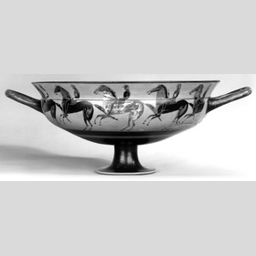

In [37]:
PIL.ImageOps.pad(image, (256,256),color=image.getpixel((0,0)))

In [2]:
from tsnecuda import TSNE
import numpy as np

Array=np.empty((256,10))

Array

array([[4.04738577e-320, 2.64819186e-321, 0.00000000e+000, ...,
        4.66618032e-310, 6.92810406e-310, 6.92814894e-310],
       [6.92810406e-310, 4.66618032e-310, 1.97626258e-323, ...,
        9.88131292e-324, 1.27319747e-313, 1.69759663e-313],
       [1.03753786e-322, 4.66618032e-310, 6.92814909e-310, ...,
        4.66618032e-310, 9.88131292e-324, 4.66618032e-310],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [3]:
A=TSNE(n_components=2).fit_transform(Array)

: 

: 